In [4]:
!pip install geemap
!pip install geehydro
!pip install ipygee
!pip install proplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.0 MB 5.2 MB/s 


In [7]:
import folium 
import geehydro
import seaborn as sns
from google.colab import files
import numpy as np # yes, numpy!
import pandas as pd # yes, pandas!
import proplot as plot 
import matplotlib.pyplot as plt 
from ipygee import*
from pandas.plotting import register_matplotlib_converters

In [8]:
uploaded = files.upload()

Saving Kgalagadi_ndvi.csv to Kgalagadi_ndvi.csv


In [10]:
df = pd.read_csv('Kgalagadi_ndvi.csv')

In [12]:
df.shape

(478, 2)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  478 non-null    object 
 1   NDVI        478 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [14]:
df.head(10)

,Unnamed: 0,NDVI
0,2000-02-18,0.331070
1,2000-03-05,0.322955
2,2000-03-21,0.330260
3,2000-04-06,0.312373
4,2000-04-22,0.288323
5,2000-05-08,0.261858
6,2000-05-24,0.240878
7,2000-06-09,0.223229
8,2000-06-25,0.210590
9,2000-07-11,0.201705


In [22]:
df.rename(columns={'Unnamed: 0': 'date','NDVI':'ndvi'},inplace=True)
df.columns

Index(['date', 'ndvi'], dtype='object')

In [24]:
print(f'There are {df.isna().sum().sum()} missing values in the entire dataset.')

There are 0 missing values in the entire dataset.


In [25]:
#determine the number of unique categories in each variable
df.nunique()


date    478
ndvi    478
dtype: int64

In [34]:
#data conversions

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date') 

In [28]:
df.min()

date    2000-02-18 00:00:00
ndvi               0.150059
dtype: object

In [29]:
df[df.ndvi == df.ndvi.max()]

,date,ndvi
391,2017-02-18,0.408017


In [30]:
df[df.ndvi == df.ndvi.min()]

,date,ndvi
84,2003-10-16,0.150059


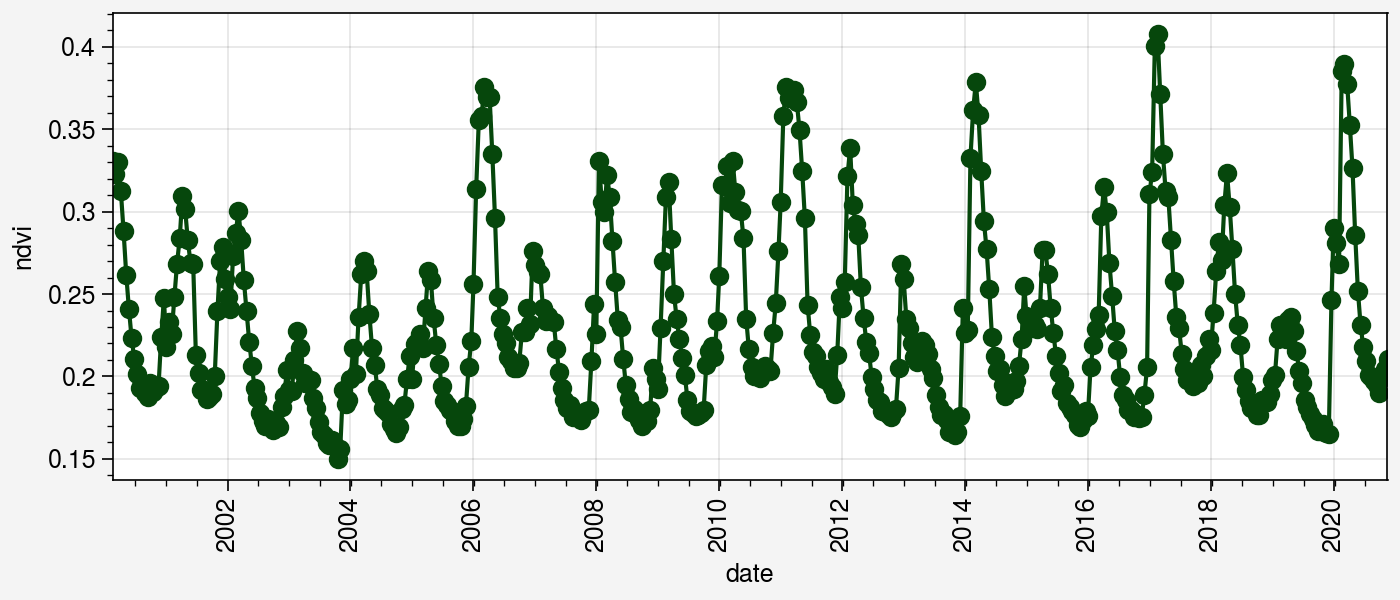

In [32]:
fig, ax = plot.subplots(figsize=(7, 3), tight=True)
ax.plot(df.date, df['ndvi'],
        color='forest green', marker='o')
plot.show()

In [35]:
# monthly averaging
df_monthly = df.groupby(pd.Grouper(freq="M")).mean()

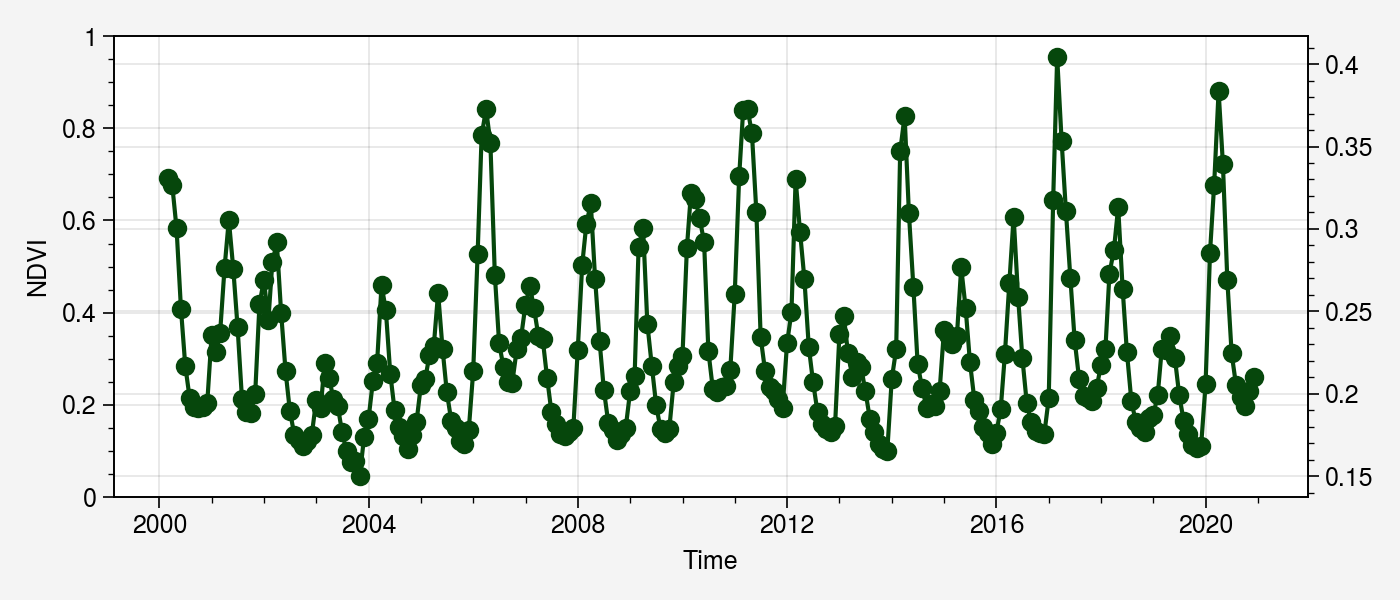

In [42]:
# plot
fig, ax1 = plt.subplots(figsize=(7, 3))
ax2 = ax1.twinx()

# NDVI
ax2.plot(df_monthly, label='NDVI',
         color='forest green', marker='o')

ax1.set_xlabel('Time')

ax1.set_ylabel('NDVI')
#ax1.set_yticks(np.arange(0.3, 1.1, 0.1))
#ax2.set_yticks(np.arange(0.3, 1.1, 0.1))
#plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# yearly averaging
df_yearly = df.groupby(pd.Grouper(freq="Y")).mean()
df_yearly

,ndvi
date,
2000-12-31,0.236673
2001-12-31,0.239841
2002-12-31,0.212372
2003-12-31,0.182875
2004-12-31,0.203423
2005-12-31,0.205415
2006-12-31,0.269699
2007-12-31,0.209714
2008-12-31,0.226211
